In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

### Exploratory Data Analysis

In [ ]:
# Reading the Training Data
df = pd.read_csv("/content/train_set_dirty.csv")

In [ ]:
# 1. Displaying the first 10 records
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1493.0,NaN,287.15,0.00,0.0,90.0,Mist,NaN,18-09-2017 22:00
1,NaN,NaN,282.25,0.00,0.0,90.0,Clouds,overcast clouds,23-05-2013 11:00
2,NaN,NaN,NaN,0.00,0.0,90.0,Drizzle,drizzle,04-06-2016 01:00
3,5626.0,NaN,252.08,0.00,0.0,20.0,Haze,haze,04-01-2017 08:00
4,5357.0,NaN,291.25,1.02,0.0,NaN,Rain,moderate rain,13-06-2013 13:00


In [ ]:
# 2. Check dataset info - field types, non-null values, dtypes
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       34748 non-null  float64
 1   holiday              42 non-null     object 
 2   temp                 34754 non-null  float64
 3   rain_1h              34860 non-null  float64
 4   snow_1h              34733 non-null  float64
 5   clouds_all           34659 non-null  float64
 6   weather_main         34654 non-null  object 
 7   weather_description  34751 non-null  object 
 8   date_time            34683 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.6+ MB


,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,34748.000000,34754.000000,34860.000000,34733.000000,34659.000000
mean,3254.207753,281.164396,0.414656,0.000242,49.472605
std,1987.318504,13.534323,52.665546,0.008662,39.013199
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1187.000000,272.150000,0.000000,0.000000,1.000000
50%,3370.500000,282.420000,0.000000,0.000000,64.000000
75%,4931.000000,291.770000,0.000000,0.000000,90.000000
max,7280.000000,308.430000,9831.300000,0.510000,100.000000


In [ ]:
df.describe(include=['O'])

,holiday,weather_main,weather_description,date_time
count,42,34654,34751,34683
unique,11,11,38,30414
top,New Years Day,Clouds,sky is clear,05-11-2017 01:00
freq,5,10938,8335,5


1) We have three Multi Categorical Variables **'holiday'**, **'weather_main'**, **'weather_description**

2) The no. of sub-categories each has are **11**, **11** & **38** respectively

3) The categories with highest frequency are **New Years Day**, **Clouds**, **sky is clear** respectively


In [ ]:
df['holiday'].value_counts()

holiday
New Years Day                5
Columbus Day                 5
Christmas Day                5
Veterans Day                 5
Memorial Day                 4
Martin Luther King Jr Day    4
Thanksgiving Day             4
Labor Day                    3
State Fair                   3
Independence Day             2
Washingtons Birthday         2
Name: count, dtype: int64

In [ ]:
df['weather_main'].value_counts()

weather_main
Clouds          10938
Clear            9556
Mist             4273
Rain             4089
Snow             2101
Drizzle          1298
Haze              994
Thunderstorm      716
Fog               670
Smoke              17
Squall              2
Name: count, dtype: int64

In [ ]:
df['weather_description'].value_counts()

weather_description
sky is clear                           8335
mist                                   4339
overcast clouds                        3702
broken clouds                          3318
scattered clouds                       2496
light rain                             2414
few clouds                             1423
light snow                             1396
Sky is Clear                           1238
moderate rain                          1230
haze                                    993
light intensity drizzle                 744
fog                                     661
proximity thunderstorm                  487
drizzle                                 478
heavy snow                              457
heavy intensity rain                    341
snow                                    221
proximity shower rain                   105
thunderstorm                             82
heavy intensity drizzle                  50
thunderstorm with heavy rain             45
proximity th

In [ ]:
df['date_time'].value_counts()

date_time
05-11-2017 01:00    5
14-04-2018 09:00    5
19-05-2013 08:00    5
21-05-2013 23:00    5
20-03-2018 14:00    5
                   ..
29-08-2013 21:00    1
04-02-2013 16:00    1
04-01-2016 21:00    1
26-03-2018 00:00    1
01-05-2013 04:00    1
Name: count, Length: 30414, dtype: int64

In [ ]:
df.isnull().mean() * 100

traffic_volume          9.892903
holiday                99.891087
temp                    9.877344
rain_1h                 9.602469
snow_1h                 9.931800
clouds_all             10.123694
weather_main           10.136659
weather_description     9.885123
date_time              10.061458
dtype: float64

Inference from the given dataset

- Each feature has apporoximately **10%** of Null values except the 'holiday' feature.

- In the holidays feature, we have only **42** rows (**1%**) where a holiday is mentioned. Rest are simply Null values.

- **‘weather_main’** feature effectively summarizes the weather data.

- Rain and Snow features being seasonal, majority of data have 0 values, and hence would not be relevant for the model

# Univariate Analysis

##### Now, we'll explore the data distribution of the numerical features and the target variable as well

array([[<Axes: title={'center': 'traffic_volume'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'rain_1h'}>,
        <Axes: title={'center': 'snow_1h'}>],
       [<Axes: title={'center': 'clouds_all'}>, <Axes: >]], dtype=object)

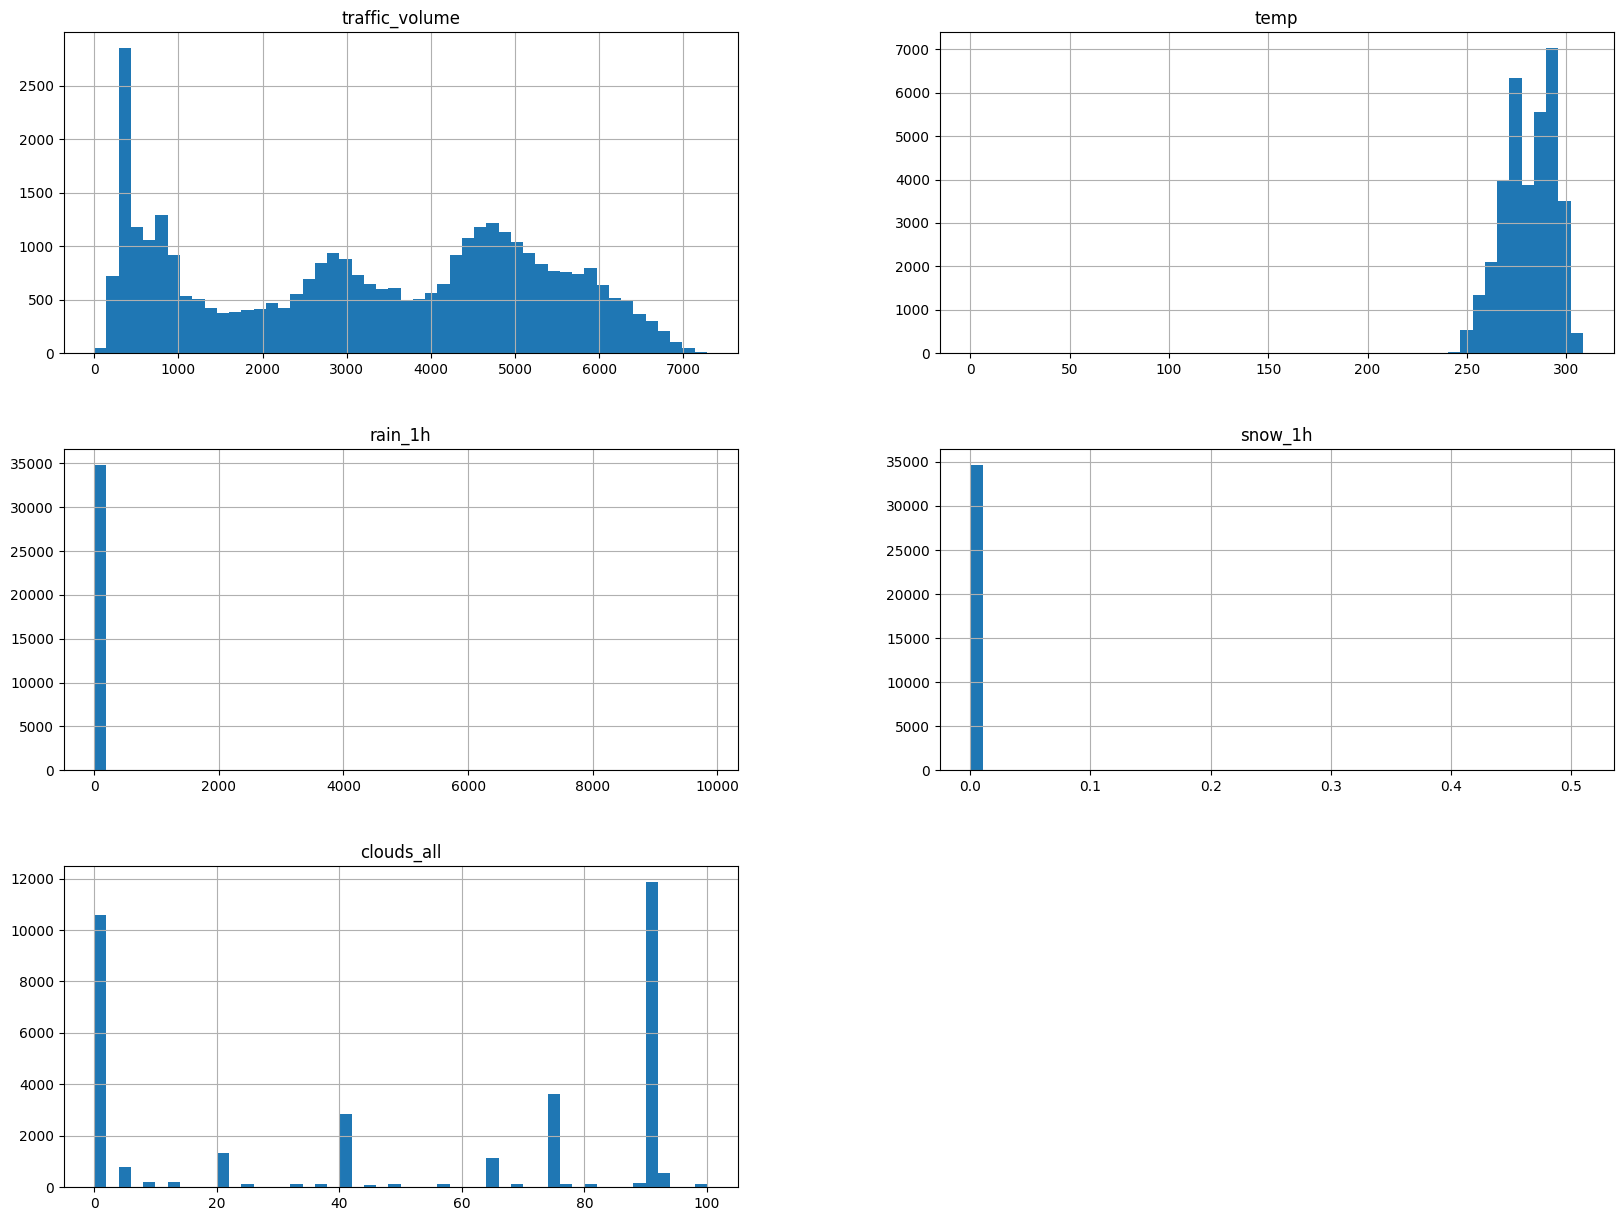

In [ ]:
df.hist(bins=50, figsize=(20,15))

It's evident from the graphs that 'rain_1h' and 'snow_1h' have inadequate representation in the dataset.

### Holiday

<Axes: xlabel='count', ylabel='holiday'>

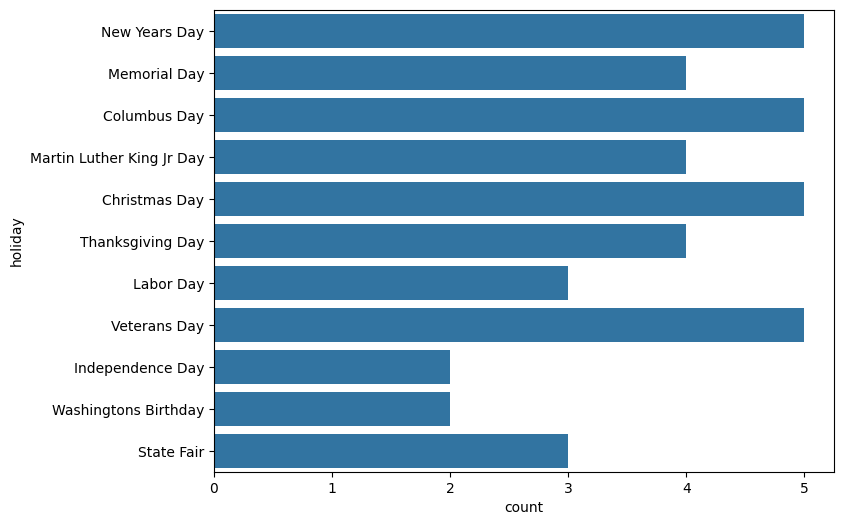

In [ ]:
holidays = df.loc[df.holiday != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)

 Bar chart removing the rows ‘None’ to have a look just of the holidays

<Axes: xlabel='traffic_volume', ylabel='holiday'>

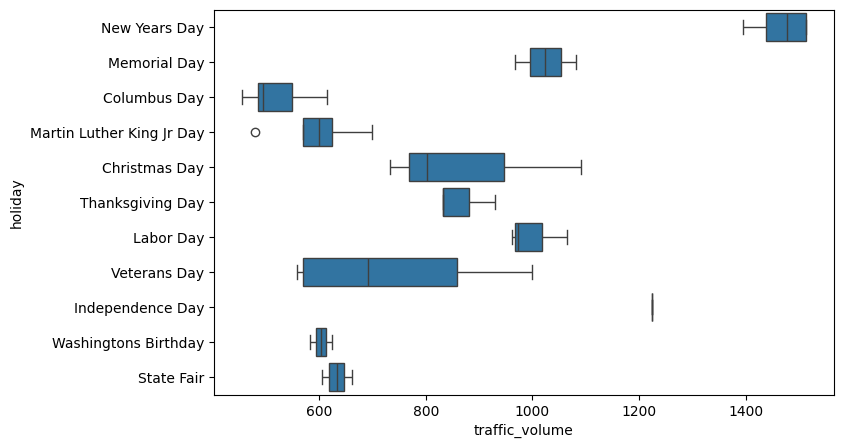

In [ ]:
#Exploring traffic volume on holidays
plt.figure(figsize=(8,5))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays)

The distribution of the traffic volume during the public holidays has on average low values.
 There is an exception: “New Years Day” is a holiday that reaches very high traffic volume

### Weather_main

<Axes: xlabel='count', ylabel='weather_main'>

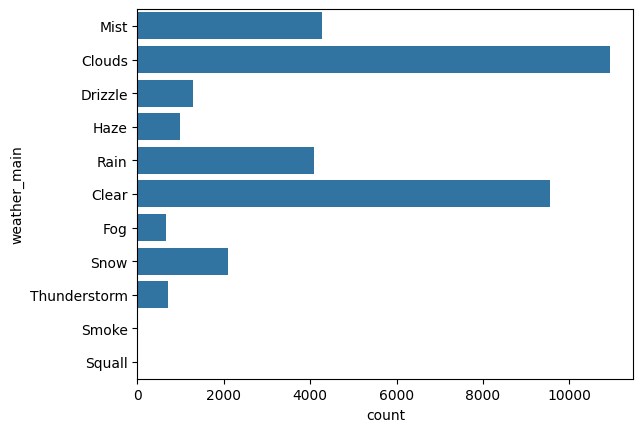

In [ ]:
sns.countplot(y='weather_main', data=df)

Visualization of the 'weather_main' category distribution in the dataset`

<Axes: xlabel='traffic_volume', ylabel='weather_main'>

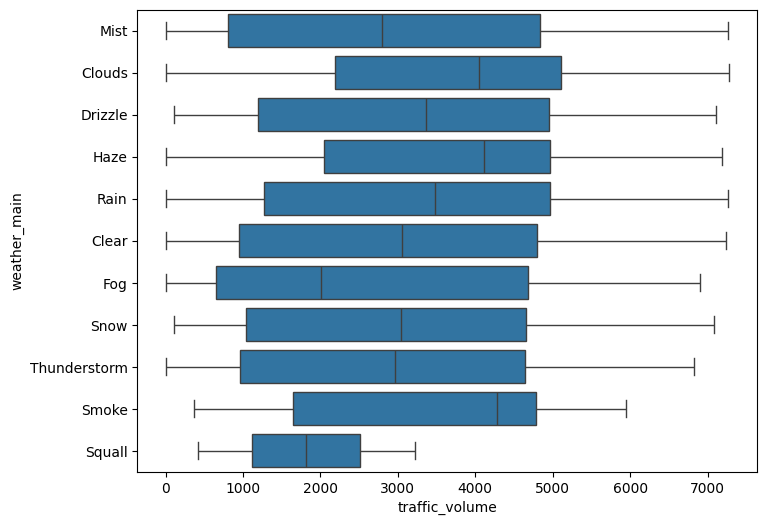

In [ ]:
 #Exploring traffic volume on weather
plt.figure(figsize=(8,6))
sns.boxplot(y='weather_main',x='traffic_volume', data = df)

Among the various types of weather, the ones that have on average lower traffic volumes are ‘Squall’
 and ‘Fog’. The weather for which are registered, on average, major traffic volumes are ‘Clouds’ and
 ‘Haze’.

### Correlation between numerical features and target variable

In [ ]:
df_numerical_features = df[['temp','clouds_all','rain_1h','snow_1h','traffic_volume']]
df_corr = df_numerical_features.corr()
df_corr['traffic_volume']

temp              0.126492
clouds_all        0.067152
rain_1h          -0.020712
snow_1h          -0.003461
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

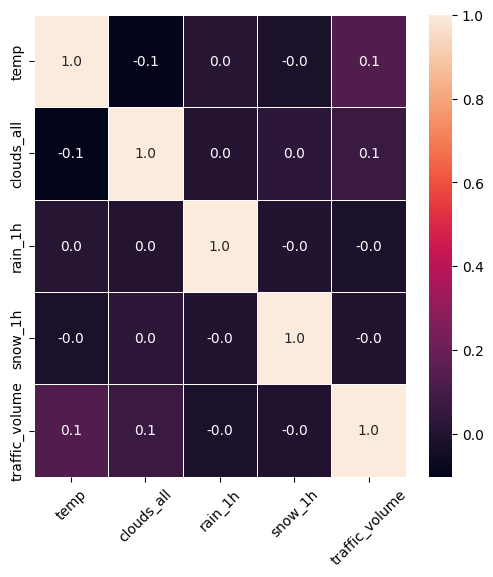

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(df_corr, annot = True, linewidths = .5, fmt = '.1f', ax = ax)
plt.xticks(rotation =45)
plt.show()

 It's clear that there isn't a strong correlation observed between the features and the target variable.

### Clouds_All

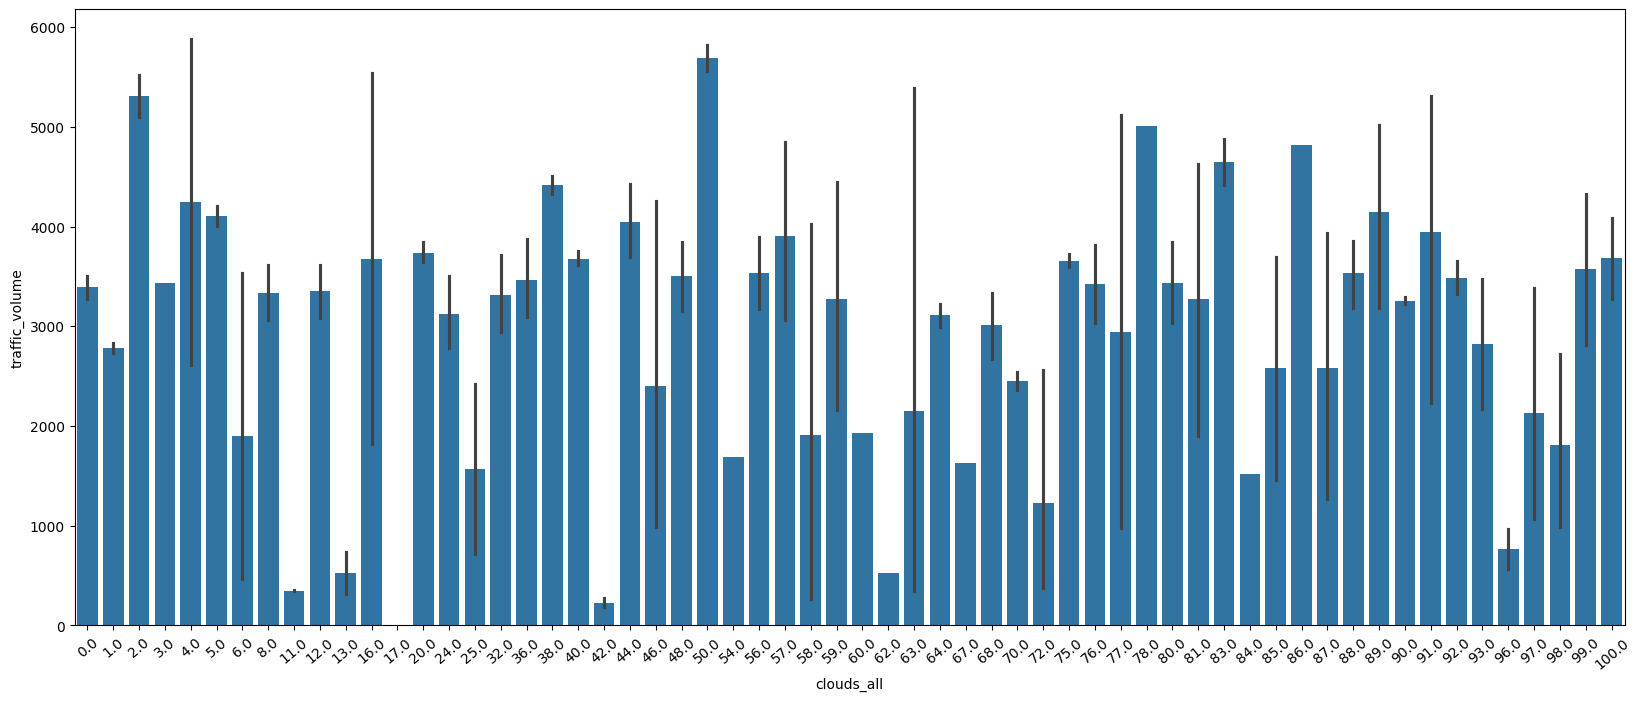

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation =40)
sns.barplot(x='clouds_all', y = 'traffic_volume', data = df)
# plt.xticks(rotation =40)
plt.show()

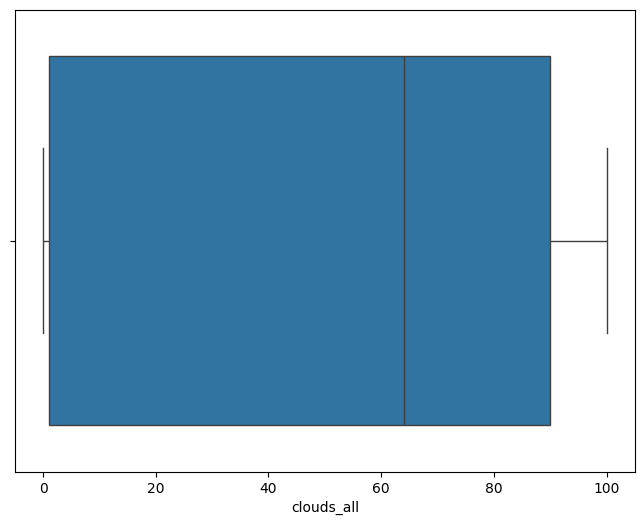

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='clouds_all', data = df)
plt.show()

The distribution of 'traffic volume' appears highly erratic in relation to the 'clouds_all' feature.






### Temp

<Axes: xlabel='temp', ylabel='traffic_volume'>

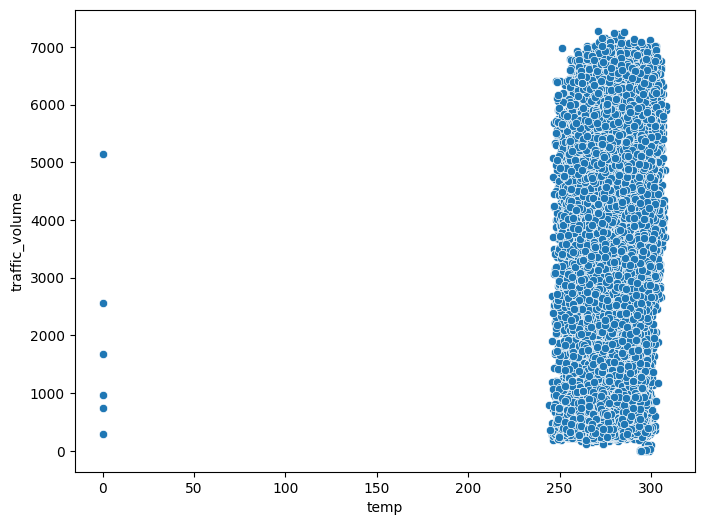

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='traffic_volume', x='temp', data = df)

<Axes: xlabel='temp'>

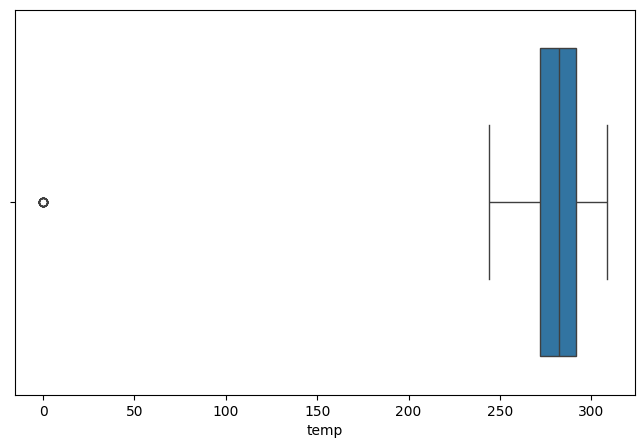

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='temp', data = df)

### Weather_description

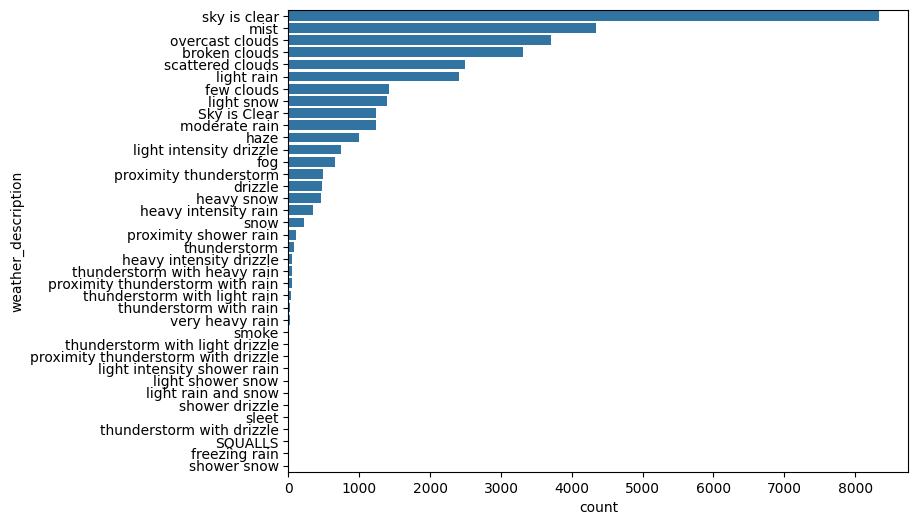

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y='weather_description', data= df, order =df['weather_description'].value_counts().index)
plt.show()

- I decided to remove the **'weather_description'** feature because the information I could get from it was not strictly necessary, given the feature **‘weather_main’** which effectively summarizes the weather data.

# Pre-processing (Cleaning)
### Handling missing (NULL) values - drop or imputation

In [ ]:
data = df.copy(deep = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       34748 non-null  float64
 1   holiday              42 non-null     object 
 2   temp                 34754 non-null  float64
 3   rain_1h              34860 non-null  float64
 4   snow_1h              34733 non-null  float64
 5   clouds_all           34659 non-null  float64
 6   weather_main         34654 non-null  object 
 7   weather_description  34751 non-null  object 
 8   date_time            34683 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.6+ MB


In [ ]:
data.ffill(inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       38563 non-null  float64
 1   holiday              37589 non-null  object 
 2   temp                 38563 non-null  float64
 3   rain_1h              38563 non-null  float64
 4   snow_1h              38563 non-null  float64
 5   clouds_all           38563 non-null  float64
 6   weather_main         38563 non-null  object 
 7   weather_description  38562 non-null  object 
 8   date_time            38563 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.6+ MB


#### Removing Duplicate Rows

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.shape

(38560, 9)

In [ ]:
updated_data = data.drop(['snow_1h', 'rain_1h','weather_description'] , axis =1)

In [ ]:
updated_data.head()

,traffic_volume,holiday,temp,clouds_all,weather_main,date_time
0,1493.0,NaN,287.15,90.0,Mist,18-09-2017 22:00
1,1493.0,NaN,282.25,90.0,Clouds,23-05-2013 11:00
2,1493.0,NaN,282.25,90.0,Drizzle,04-06-2016 01:00
3,5626.0,NaN,252.08,20.0,Haze,04-01-2017 08:00
4,5357.0,NaN,291.25,20.0,Rain,13-06-2013 13:00


In [ ]:
updated_data['holiday'] = updated_data['holiday'].apply(lambda x: 'Work day' if pd.isna(x) else 'holiday' )

In [ ]:
updated_data.head()

,traffic_volume,holiday,temp,clouds_all,weather_main,date_time
0,1493.0,Work day,287.15,90.0,Mist,18-09-2017 22:00
1,1493.0,Work day,282.25,90.0,Clouds,23-05-2013 11:00
2,1493.0,Work day,282.25,90.0,Drizzle,04-06-2016 01:00
3,5626.0,Work day,252.08,20.0,Haze,04-01-2017 08:00
4,5357.0,Work day,291.25,20.0,Rain,13-06-2013 13:00


In [ ]:
updated_data['date_time'] = pd.to_datetime(updated_data['date_time'], format = '%d-%m-%Y %H:%M')

In [ ]:
updated_data['year'] = updated_data['date_time'].dt.year
updated_data['month'] = updated_data['date_time'].dt.month
updated_data['weekday'] = updated_data['date_time'].dt.weekday
updated_data['hours'] = updated_data['date_time'].dt.hour

In [ ]:
updated_data.shape

(38560, 10)

In [ ]:
updated_data.head()

,traffic_volume,holiday,temp,clouds_all,weather_main,date_time,year,month,weekday,hours
0,1493.0,Work day,287.15,90.0,Mist,2017-09-18 22:00:00,2017,9,0,22
1,1493.0,Work day,282.25,90.0,Clouds,2013-05-23 11:00:00,2013,5,3,11
2,1493.0,Work day,282.25,90.0,Drizzle,2016-06-04 01:00:00,2016,6,5,1
3,5626.0,Work day,252.08,20.0,Haze,2017-01-04 08:00:00,2017,1,2,8
4,5357.0,Work day,291.25,20.0,Rain,2013-06-13 13:00:00,2013,6,3,13


In [ ]:
updated_data['hours'].unique()

array([22, 11,  1,  8, 13, 20, 23, 10,  5, 16, 18,  0, 14,  9, 21, 19,  4,
        6, 15,  7,  2, 17,  3, 12], dtype=int32)

In [ ]:
# we will create a function ,which will split the hours into the 4 categories
def day_part(hour):
  day_part = ''
  if hour in [1,2,3,4,5]:
    day_part = 'before_sunrise'
  elif hour in [6,7,8,9,10,11,12]:
    day_part = 'after_sunrise'
  elif hour in [13,14, 15, 16, 17, 18]:
    day_part = 'evening'
  else :
    day_part = 'night'
  return day_part

In [ ]:
updated_data['day_part'] = updated_data['hours'].map(day_part)

In [ ]:
updated_data.head(10)
updated_data.shape

(38560, 11)

Next we One hot encode the categorical features 'holiday', 'weather_main' and day part using **.get_dummies** function

In [ ]:
updated_data = pd.get_dummies(updated_data, columns =['holiday', 'weather_main','day_part'])

In [ ]:
updated_data.shape
updated_data.head()

,traffic_volume,temp,clouds_all,date_time,year,month,weekday,hours,holiday_Work day,holiday_holiday,...,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,day_part_after_sunrise,day_part_before_sunrise,day_part_evening,day_part_night
0,1493.0,287.15,90.0,2017-09-18 22:00:00,2017,9,0,22,True,False,...,True,False,False,False,False,False,False,False,False,True
1,1493.0,282.25,90.0,2013-05-23 11:00:00,2013,5,3,11,True,False,...,False,False,False,False,False,False,True,False,False,False
2,1493.0,282.25,90.0,2016-06-04 01:00:00,2016,6,5,1,True,False,...,False,False,False,False,False,False,False,True,False,False
3,5626.0,252.08,20.0,2017-01-04 08:00:00,2017,1,2,8,True,False,...,False,False,False,False,False,False,True,False,False,False
4,5357.0,291.25,20.0,2013-06-13 13:00:00,2013,6,3,13,True,False,...,False,True,False,False,False,False,False,False,True,False


#### Set the column 'date_time' as index

In [ ]:
updated_data.set_index('date_time',inplace = True)

In [ ]:
updated_data.head()

,traffic_volume,temp,clouds_all,year,month,weekday,hours,holiday_Work day,holiday_holiday,weather_main_Clear,...,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,day_part_after_sunrise,day_part_before_sunrise,day_part_evening,day_part_night
date_time,,,,,,,,,,,,,,,,,,,,,
2017-09-18 22:00:00,1493.0,287.15,90.0,2017,9,0,22,True,False,False,...,True,False,False,False,False,False,False,False,False,True
2013-05-23 11:00:00,1493.0,282.25,90.0,2013,5,3,11,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2016-06-04 01:00:00,1493.0,282.25,90.0,2016,6,5,1,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2017-01-04 08:00:00,5626.0,252.08,20.0,2017,1,2,8,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2013-06-13 13:00:00,5357.0,291.25,20.0,2013,6,3,13,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
target = updated_data['traffic_volume']

In [ ]:
x = updated_data.iloc[:, 1:]
x.describe()

,temp,clouds_all,year,month,weekday,hours
count,38560.000000,38560.000000,38560.000000,38560.000000,38560.000000,38560.000000
mean,281.158638,49.480654,2015.514601,6.483610,2.982080,11.414004
std,13.811096,39.023601,1.894312,3.405509,2.009654,6.947594
min,0.000000,0.000000,2012.000000,1.000000,0.000000,0.000000
25%,272.180000,1.000000,2014.000000,4.000000,1.000000,5.000000
50%,282.450000,64.000000,2016.000000,7.000000,3.000000,11.000000
75%,291.770000,90.000000,2017.000000,9.000000,5.000000,17.250000
max,308.430000,100.000000,2018.000000,12.000000,6.000000,23.000000


In [ ]:
corr_updated_data = updated_data.corr()
corr_updated_data['traffic_volume']

traffic_volume               1.000000
temp                         0.097496
clouds_all                   0.052772
year                         0.002055
month                       -0.002565
weekday                     -0.124969
hours                        0.284311
holiday_Work day            -0.007049
holiday_holiday              0.007049
weather_main_Clear          -0.052074
weather_main_Clouds          0.098754
weather_main_Drizzle        -0.000133
weather_main_Fog            -0.032620
weather_main_Haze            0.022711
weather_main_Mist           -0.051218
weather_main_Rain            0.008575
weather_main_Smoke           0.000544
weather_main_Snow           -0.026031
weather_main_Squall         -0.001758
weather_main_Thunderstorm   -0.011520
day_part_after_sunrise       0.317302
day_part_before_sunrise     -0.522354
day_part_evening             0.415359
day_part_night              -0.250242
Name: traffic_volume, dtype: float64

## Correlation after Feature Engineering

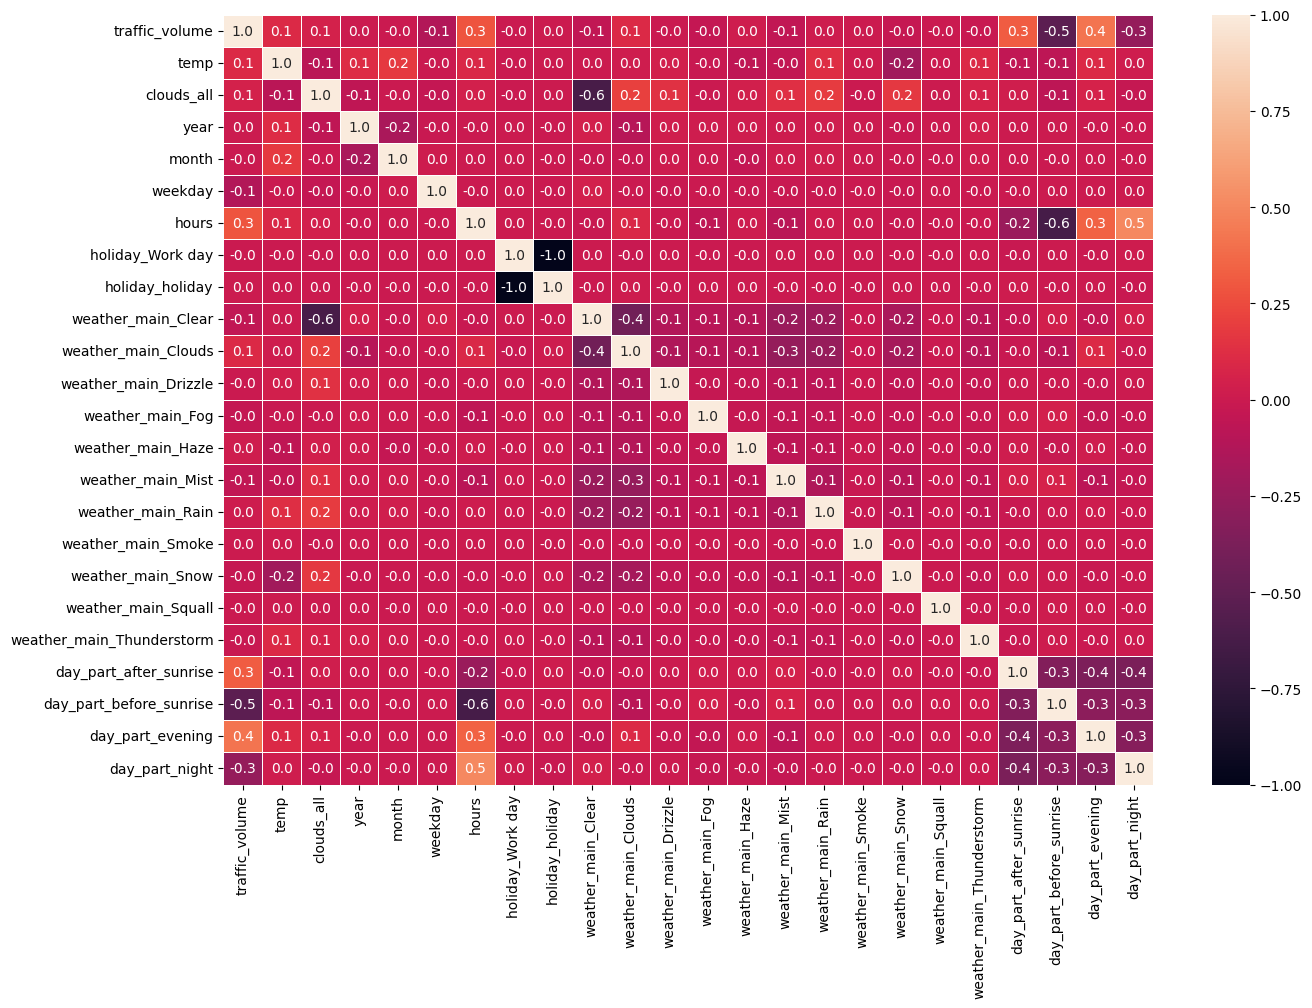

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.xticks(rotation =45)
sns.heatmap(corr_updated_data, annot = True, linewidths = .5, fmt = '.1f', ax = ax)
plt.show()

We can see that there is a negative correlation between day_part_before_sunrise and traffic_volume and hour features

# Feature Importance and Selection using Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 32)

In [ ]:
rf.fit(x, target)

RandomForestRegressor(random_state=32)

In [ ]:
rf.feature_importances_

array([1.51675652e-01, 3.78318250e-02, 3.86086113e-02, 5.50693471e-02,
       9.55041734e-02, 5.00136294e-01, 1.87976757e-03, 1.77064495e-03,
       7.53020946e-03, 8.87031115e-03, 3.71682426e-03, 3.47922753e-03,
       3.02618522e-03, 8.75559078e-03, 7.18903816e-03, 1.22806775e-05,
       4.72924041e-03, 1.40006412e-05, 2.57729914e-03, 5.62398029e-04,
       2.97334762e-04, 6.71948711e-04, 6.60917957e-02])

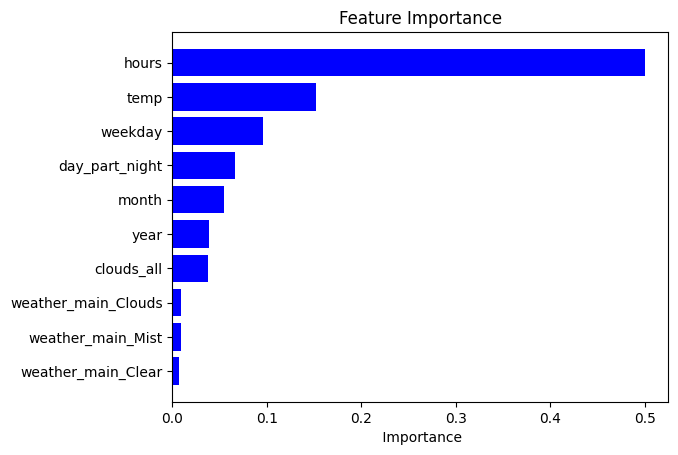

In [ ]:
features = x.columns
importance = rf.feature_importances_
indices = np.argsort(importance)[-10:] # Top 10 features
plt.title('Feature Importance' )
plt.barh(range(len(indices)), importance[indices], color= 'blue', align = 'center')
plt.yticks(range(len(indices)), [features[feature] for feature in indices])
plt.xlabel(' Importance')
plt.show()

## Model Development

Let's select the top 7 important features selected by Random Forests

In [ ]:
important_features = [ 'hours','temp','weekday','day_part_night','month', 'year','clouds_all']

Splitting the dataset into training and validation set. This validation set is to assess the performance of the model during training

For the hackathon we have our test dataset without the ground truth values

In [ ]:
# Train and validation Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x[important_features],target,test_size=0.25,random_state=32)
x_train.head()

,hours,temp,weekday,day_part_night,month,year,clouds_all
date_time,,,,,,,
2018-06-16 10:00:00,10,294.36,5,False,6,2018,20.0
2016-07-27 17:00:00,17,289.89,2,False,7,2016,90.0
2017-09-22 21:00:00,21,302.22,4,True,9,2017,1.0
2017-12-16 20:00:00,20,269.65,5,True,12,2017,90.0
2018-08-22 03:00:00,3,286.42,2,False,8,2018,1.0


#### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
scale.fit(x_train)

StandardScaler()

In [ ]:
x_train_scaled = scale.transform(x_train)

In [ ]:
x_test_scaled = scale.transform(x_test)

## Experimenting with different models

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
def tune_hyperparameters(model, params, x_train_scaled, y_train):
    grid_search = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(x_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    return best_model

In [ ]:
def model_training(models, params_list, model_names, x_train_scaled, x_test_scaled, y_train, y_test):
    best_models = []
    r2_stats = []
    mse_stats = []

    for model, params in zip(models, params_list):
        best_model = tune_hyperparameters(model, params, x_train_scaled, y_train)
        best_models.append(best_model)
        best_model.fit(x_train_scaled, y_train)
        y_pred = best_model.predict(x_test_scaled)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2_stats.append(r2)
        mse_stats.append(mse)

    result_df = pd.DataFrame(list(zip(model_names, r2_stats, mse_stats)), columns=['Model', 'R2_Score', 'MSE'])
    return result_df, best_models


In [ ]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SVR(),
    XGBRegressor(),
    HistGradientBoostingRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor()
]

params_list = [
    {},
    {'alpha': [0.1, 1.0, 10.0]},
    {'alpha': [0.1, 1.0, 10.0]},
    {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1.0, 10.0]},
    {'n_estimators': [100, 500, 1000]},
    {'max_iter': [100, 500, 1000]},
    {},
    {'n_neighbors': [3, 5, 7]},
    {}
]

model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'SVR', 'XGB Regressor', 'Hist Gradient Boost Regressor', 'Random Forest Regressor', 'K Neighbors Regressor', 'Decision Tree Regressor']


In [ ]:
result, best_models = model_training(models, params_list, model_names, x_train_scaled, x_test_scaled, y_train, y_test)


In [ ]:
result

,Model,R2_Score,MSE
0,Linear Regression,0.302860,2.737898e+06
1,Ridge Regression,0.302860,2.737897e+06
2,Lasso Regression,0.302823,2.738042e+06
3,ElasticNet Regression,0.302866,2.737873e+06
4,SVR,0.475173,2.061167e+06
5,XGB Regressor,0.623660,1.478011e+06
6,Hist Gradient Boost Regressor,0.635219,1.432613e+06
7,Random Forest Regressor,0.598299,1.577612e+06
8,K Neighbors Regressor,0.544021,1.790780e+06
9,Decision Tree Regressor,0.280460,2.825870e+06


In [ ]:
best_models

[LinearRegression(),
 Ridge(),
 Lasso(),
 ElasticNet(alpha=0.1, l1_ratio=0.9),
 SVR(C=10.0),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 HistGradientBoostingRegressor(max_iter=1000),
 RandomForestRegressor(),
 KNeighborsRegressor(n_neighbors=7),
 DecisionTreeRegressor()]

In [ ]:
hgbr = HistGradientBoostingRegressor(max_iter=1000, random_state=32)
hgbr.fit(x_train_scaled, y_train)
y_pred = hgbr.predict(x_test_scaled)
print(f"r2 score : {r2_score(y_test, y_pred)} mean squared error : {mean_squared_error(y_test, y_pred)} mean absolute error : {mean_absolute_error(y_test,y_pred)} ")

r2 score : 0.6363595335511663 mean squared error : 1428134.9503104924 mean absolute error : 746.6250061699078 


## Testing and Creating Output CSV

In [ ]:
test_pd = pd.read_csv('/content/test_set_nogt.csv')
test = test_pd.copy(deep=True)

In [ ]:
# Prepare data to be given as an input to your trained model

In [ ]:
processed_test = test.drop(['snow_1h', 'rain_1h','weather_description'] , axis =1)

In [ ]:
processed_test['holiday'] = processed_test['holiday'].apply(lambda x: 'Work day' if pd.isna(x) else 'holiday' )

In [ ]:
processed_test['date_time'] = pd.to_datetime(processed_test['date_time'], format = '%d-%m-%Y %H:%M')

In [ ]:
processed_test['year'] = processed_test['date_time'].dt.year
processed_test['month'] = processed_test['date_time'].dt.month
processed_test['weekday'] = processed_test['date_time'].dt.weekday
processed_test['hours'] =processed_test['date_time'].dt.hour

In [ ]:
processed_test['day_part'] = processed_test['hours'].map(day_part)

In [ ]:
processed_test = pd.get_dummies(processed_test, columns =['holiday', 'weather_main','day_part'])

In [ ]:
processed_test.set_index('date_time',inplace = True)

In [ ]:
processed_test= processed_test[important_features]

In [ ]:
scale_test = StandardScaler()

In [ ]:
scale_test.fit(processed_test)

StandardScaler()

In [ ]:
test_scaled = scale_test.transform(processed_test)

In [ ]:
y_pred = hgbr.predict(test_scaled)

In [ ]:
submission = pd.DataFrame({'ID': test_pd.index, 'traffic_volume' : y_pred})
submission.to_csv('submission.csv', index=False)